In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pprint as pp

from scipy import signal
%matplotlib inline

# Enable zooming on plots
# import mpld3
# mpld3.enable_notebook()

# Good plotting info: http://stackoverflow.com/questions/21109521/pandas-plot-multiple-columns-to-same-x-value

# To load
df = pd.read_csv('dataframe.csv', index_col='Sample ID') 
df.head()

,Number,Series,MaxIntensity,TotalIntensity,100us,2ms,100ms
Sample ID,,,,,,,
T1,1,T,168200,15500290,12.582230,13.268971,15.460162
T2,2,T,165300,15583850,12.478842,12.867879,15.012790
T3,3,T,132600,14499530,12.041918,12.489060,NaN
T4,4,T,160600,16723680,1.541386,1.512246,14.859698
T5,5,T,119400,14065800,12.971974,13.281922,15.131072


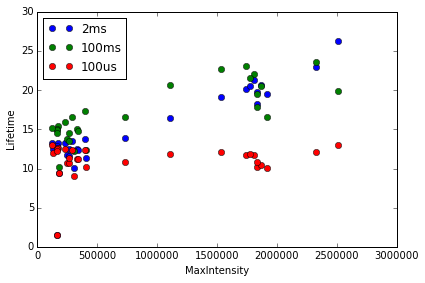

In [2]:
#plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(df.MaxIntensity, df['2ms'], 'o', label='2ms')
ax.plot(df.MaxIntensity, df['100ms'], 'o', label='100ms')
ax.plot(df.MaxIntensity, df['100us'], 'o', label='100us')
plt.xlabel('MaxIntensity'); plt.ylabel('Lifetime')
plt.legend(loc='best')
plt.tight_layout()

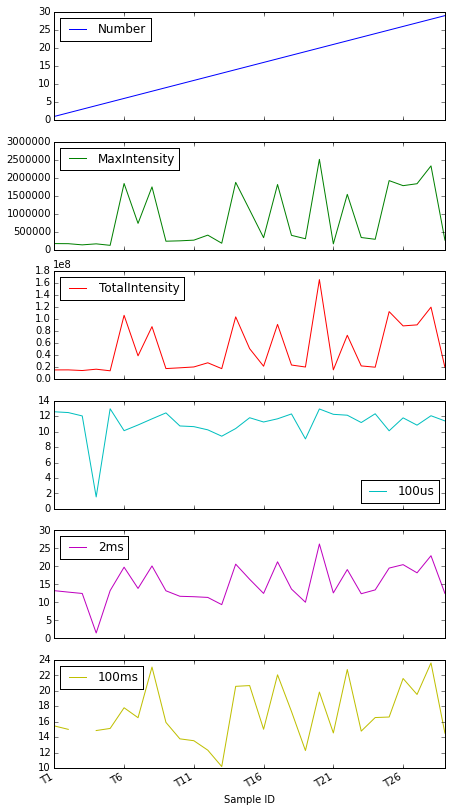

In [3]:
# Overview
df.plot(subplots=True, figsize=(7, 15));

In [7]:
df.describe()

,Number,MaxIntensity,TotalIntensity,100us,2ms,100ms
count,29.000000,29.000000,2.900000e+01,29.000000,29.000000,28.000000
mean,15.000000,866610.344828,5.011127e+07,11.080708,15.061635,17.000222
std,8.514693,813554.637003,4.308999e+07,2.101074,5.048463,3.617086
min,1.000000,119400.000000,1.406580e+07,1.541386,1.512246,10.193316
25%,8.000000,234000.000000,1.776284e+07,10.654805,12.489060,14.725463
50%,15.000000,336400.000000,2.218391e+07,11.664499,13.281922,16.220073
75%,22.000000,1777000.000000,8.889268e+07,12.251601,19.541747,20.032462
max,29.000000,2508000.000000,1.660913e+08,12.971974,26.230614,23.624091


In [8]:
# Add Screening manufacturing parameters
df2 = pd.read_csv('screening.csv', index_col='Sample ID') 
df2.head()

,StdOrder,RunOrder,CenterPt,Blocks,Er,Yb,Deposition Time,Pressure,LaserPower,Trigger
Sample ID,,,,,,,,,,
T2,5,1,1,1,-1,-1,1,1,65,0.5
T4,4,2,1,1,1,1,-1,-1,65,0.5
T5,1,3,1,1,-1,-1,-1,-1,65,0.5
T6,8,4,1,1,1,1,1,1,65,0.5
T7,2,5,1,1,1,-1,-1,1,65,0.5


In [12]:
result = pd.concat([df, df2], axis=1)
result = result.sort_values(by='RunOrder')
result.head(30)

,Number,Series,MaxIntensity,TotalIntensity,100us,2ms,100ms,StdOrder,RunOrder,CenterPt,Blocks,Er,Yb,Deposition Time,Pressure,LaserPower,Trigger
T2,2,T,165300,15583850,12.478842,12.867879,15.012790,5,1,1,1,-1,-1,1,1,65,0.5
T4,4,T,160600,16723680,1.541386,1.512246,14.859698,4,2,1,1,1,1,-1,-1,65,0.5
T5,5,T,119400,14065800,12.971974,13.281922,15.131072,1,3,1,1,-1,-1,-1,-1,65,0.5
T6,6,T,1837000,106562600,10.131770,19.791586,17.812902,8,4,1,1,1,1,1,1,65,0.5
T7,7,T,729200,39020060,10.870046,13.886549,16.525283,2,5,1,1,1,-1,-1,1,65,0.5
T8,8,T,1743000,87668060,11.664499,20.128905,23.087895,7,6,1,1,-1,1,1,-1,65,0.5
T10,10,T,244500,19032270,10.742143,11.706400,13.782935,11,7,0,1,0,0,0,0,65,0.5
T11,11,T,263400,20454230,10.654805,11.588422,13.540645,10,8,0,1,0,0,0,0,65,0.5
T14,14,T,1869000,103949210,10.407751,20.632098,20.589513,6,9,1,1,1,-1,1,-1,65,0.5
T15,15,T,1103000,50932710,11.808809,16.430619,20.688817,3,10,1,2,-1,1,-1,1,65,0.5


In [13]:
# Get only Ts used for screening (drop rows where run order is not finite, i.e. NaN)
df = result[np.isfinite(result['RunOrder'])]
df.head(30)

,Number,Series,MaxIntensity,TotalIntensity,100us,2ms,100ms,StdOrder,RunOrder,CenterPt,Blocks,Er,Yb,Deposition Time,Pressure,LaserPower,Trigger
T2,2,T,165300,15583850,12.478842,12.867879,15.012790,5,1,1,1,-1,-1,1,1,65,0.5
T4,4,T,160600,16723680,1.541386,1.512246,14.859698,4,2,1,1,1,1,-1,-1,65,0.5
T5,5,T,119400,14065800,12.971974,13.281922,15.131072,1,3,1,1,-1,-1,-1,-1,65,0.5
T6,6,T,1837000,106562600,10.131770,19.791586,17.812902,8,4,1,1,1,1,1,1,65,0.5
T7,7,T,729200,39020060,10.870046,13.886549,16.525283,2,5,1,1,1,-1,-1,1,65,0.5
T8,8,T,1743000,87668060,11.664499,20.128905,23.087895,7,6,1,1,-1,1,1,-1,65,0.5
T10,10,T,244500,19032270,10.742143,11.706400,13.782935,11,7,0,1,0,0,0,0,65,0.5
T11,11,T,263400,20454230,10.654805,11.588422,13.540645,10,8,0,1,0,0,0,0,65,0.5
T14,14,T,1869000,103949210,10.407751,20.632098,20.589513,6,9,1,1,1,-1,1,-1,65,0.5
T15,15,T,1103000,50932710,11.808809,16.430619,20.688817,3,10,1,2,-1,1,-1,1,65,0.5


In [27]:
result.to_csv('tseriesdf.csv')

ValueError: Unrecognized character 0 in format string

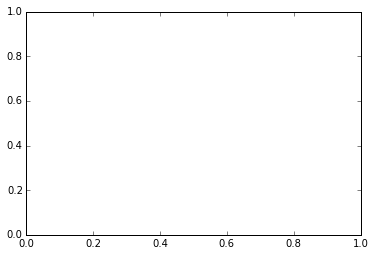

In [16]:
plt.plot("StdOrder", "100us", data=df)